# Campaign Finance Capstone

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import Files

In [2]:
%time sen_2016 = pd.read_csv('../data/2016-SEN.csv')

CPU times: user 1.98 s, sys: 212 ms, total: 2.19 s
Wall time: 2.2 s


In [3]:
%time sen_2014 = pd.read_csv('../data/2014-SEN.csv')

CPU times: user 3.19 s, sys: 351 ms, total: 3.54 s
Wall time: 3.56 s


In [4]:
#%time sen_2012 = pd.read_csv('../data/2012-SEN.csv')

In [5]:
%time sen_2010 = pd.read_csv('../data/2010-SEN.csv')

CPU times: user 5.26 s, sys: 605 ms, total: 5.86 s
Wall time: 5.88 s


### Pre-processing

In [6]:
def clean_df(df):
    df['first_last_party'] = [full_name[:-4] for full_name in df['first_last_party']]
    df['dist_id_run_for'] = [office[:2] for office in df['dist_id_run_for']]
    df['recip_code'] = [code[-1] for code in df['recip_code']]
    df.rename(columns={'first_last_party':'candidate_name', 'dist_id_run_for':'state_run_for'}, inplace=True)
    df['date'] = pd.to_datetime(df['date'])
    return df

In [7]:
# Pre-process datasets
sen_2016 = clean_df(sen_2016)
sen_2014 = clean_df(sen_2014)
#sen_2012 = clean_df(sen_2012)
sen_2010 = clean_df(sen_2010)

In [8]:
def add_commas(number):
    n = str(number)
    
    if len(n)>6:
        return n[:-6]+','+n[-6:-3]+','+n[-3:]
    elif len(n)>3:
        return n[:-3]+','+n[-3:]
    else:
        return number

In [9]:
print(f"2016 Sen - {add_commas(sen_2016.shape[0])} records")
print(f"2014 Sen - {add_commas(sen_2014.shape[0])} records")
print(f"2010 Sen - {add_commas(sen_2010.shape[0])} records")

2016 Sen - 1,490,703 records
2014 Sen - 2,344,154 records
2010 Sen - 4,261,836 records


## EDA

In [10]:
sen_2010.head()

,date,cycle,candidate_name,party,state_run_for,recip_code,raised_total,org_name,employer,ult_org,type,gender,city,state,amount
0,2009-01-13,2010,John McCain,R,AZ,W,5239565,NaN,NaN,NaN,22Y,F,TORRANCE,CA,-25
1,2009-01-18,2010,Bob Barr,R,GA,L,214799,Retired,None,NaN,15,M,CARROLLTON,TX,500
2,2009-03-30,2010,Hillary Clinton,D,NY,N,-9065,NaN,NaN,NaN,22Y,F,WOODINVILLE,WA,-300
3,2009-03-30,2010,Hillary Clinton,D,NY,I,16841210,NaN,NaN,NaN,22Y,F,WOODINVILLE,WA,-300
4,2009-03-30,2010,Hillary Clinton,D,NY,I,16841210,NaN,NaN,NaN,22Y,F,WOODINVILLE,WA,-300


In [11]:
# Top State Contests in 2016
sen_2016['state_run_for'].value_counts().head(5)

NY    622578
VT    136864
WI     62050
PA     54194
AZ     53896
Name: state_run_for, dtype: int64

In [12]:
# Why so many different recip codes for the same cycle? Are these not accurate?
sample_candidate = 'Russ Feingold'
sen_2016[sen_2016['candidate_name']==sample_candidate][['candidate_name', 'recip_code']].value_counts()

candidate_name  recip_code
Russ Feingold   I             17520
                W             11680
                N              8760
                L              2920
                C              2920
dtype: int64

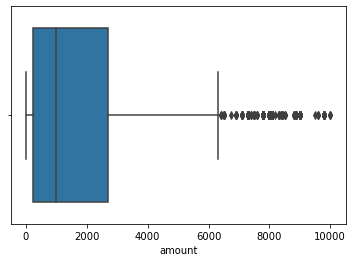

In [13]:
small_dollar_donors = sen_2016[(sen_2016['amount']<10_000)&(sen_2016['amount']>0)]['amount']
sns.boxplot(small_dollar_donors);

## Largest Number of Individual Donors

In [14]:
def num_donations(df):
    return df['candidate_name'].value_counts().sort_values(ascending=False).head(10)

In [15]:
num_donations(sen_2016)

Hillary Clinton      564466
Bernie Sanders       125616
John McCain           50312
Russ Feingold         43800
Charles E Schumer     40428
Marco Rubio           37653
Patty Murray          37362
Ted Cruz              32110
Pat Toomey            31136
Ron Wyden             28743
Name: candidate_name, dtype: int64

In [16]:
num_donations(sen_2014)

Mitch McConnell    152334
Barack Obama       111468
Mark Udall         105008
Mark Warner         89892
Jeanne Shaheen      81576
Mary L Landrieu     72621
Lindsey Graham      62271
Dick Durbin         55788
Ed Markey           54812
John Cornyn         51000
Name: candidate_name, dtype: int64

In [17]:
num_donations(sen_2010)

Barbara Boxer         339898
John McCain           203490
Russ Feingold         197040
Arlen Specter         172536
Harry Reid            162876
Patty Murray          147303
Pat Toomey            116136
Blanche Lincoln        96540
Kirsten Gillibrand     78928
Charles E Schumer      78597
Name: candidate_name, dtype: int64

## Total Raised Through Individual Contributions

In [18]:
def total_raised(df):
    return df.groupby(by='candidate_name')[['candidate_name', 'amount']].sum().sort_values(
                            by='amount', ascending=False).head(10)

In [19]:
total_raised(sen_2016)

,amount
candidate_name,
Hillary Clinton,840363790
Bernie Sanders,115017456
Charles E Schumer,72382905
John McCain,57073150
Ron Wyden,45559501
Russ Feingold,38217375
Marco Rubio,32777718
Lindsey Graham,31867176
Pat Toomey,31217704


In [20]:
total_raised(sen_2014)

,amount
candidate_name,
Mitch McConnell,188592124
Mark Warner,94432563
Mark Udall,84155752
Mary L Landrieu,67592943
Lindsey Graham,59395336
John Cornyn,57526280
Jeanne Shaheen,56601808
Ed Markey,53058716
Dick Durbin,52950408


In [21]:
total_raised(sen_2010)

,amount
candidate_name,
Barbara Boxer,215778977
Harry Reid,191305590
Linda McMahon,159317952
John R Raese,156163634
Charles E Schumer,120675663
Patty Murray,92675219
Pat Toomey,88432616
Blanche Lincoln,87559665
Russ Feingold,85016415


## Donation timestamps?

In [22]:
def time_window(Series):
    return (min(Series).strftime("%b-%d-%Y"), max(Series).strftime("%b-%d-%Y"))

In [23]:
# Timeseries window for 2016 cycle donations ?
# Starts way too early and ends in July???
time_window(sen_2016['date'])

('Jun-02-2011', 'Jul-26-2016')

In [24]:
# 2014 cycle has even more bad data
sorted(set([day.strftime("%b-%d-%Y") for day in sen_2014['date'].sort_values().head(20)]))

['Dec-26-1926', 'May-30-1916', 'Oct-02-1918', 'Oct-03-1918', 'Sep-15-1955']